# Student Exam Performance Prediction

Dataset Features:
- Study Hours (numeric): Represents the number of hours a student spent studying for the upcoming exam.
- Previous Exam Score (numeric): Indicates the student's score in the previous exam.
- Pass/Fail (binary): The target variable, where 1 represents a pass and 0 represents a fail in the current exam.

### Problem Statement
Predicting whether a student will pass or fail an exam based on the number of study hours and their scores in the previous exam.


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset 
data = pd.read_csv('score.csv')
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [3]:
data.shape

(500, 3)

## Exploratory Data Analysis

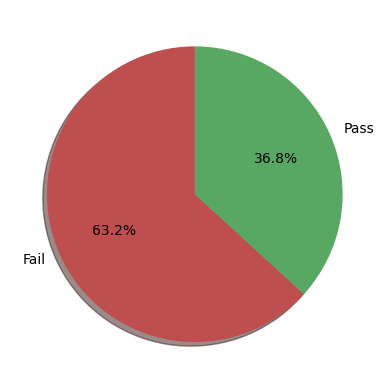

In [4]:
plt.pie(data['Pass/Fail'].value_counts(), labels = ['Fail' , 'Pass'], autopct = '%1.1f%%', startangle = 90, shadow = True , colors = ['#bf4e4e', '#58a864'])
plt.show()

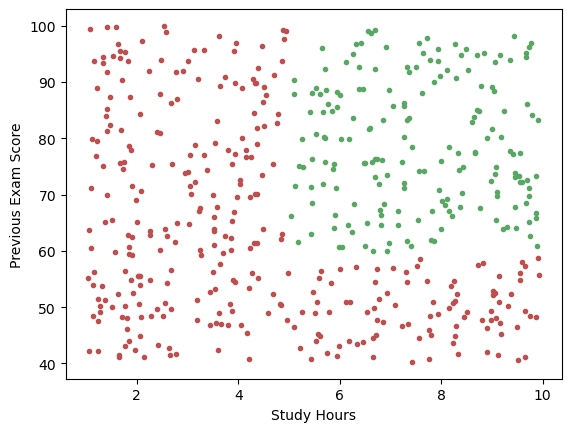

In [5]:
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')

plt.scatter(data[data['Pass/Fail'] == 0]['Study Hours'], data[data['Pass/Fail'] == 0]['Previous Exam Score'], color = '#bf4e4e', marker = '.')
plt.scatter(data[data['Pass/Fail'] == 1]['Study Hours'], data[data['Pass/Fail'] == 1]['Previous Exam Score'], color = '#58a864', marker = '.')

The pie chart indicates 63.2% of students failed and 36.8% passed

In [6]:
mean_score = np.mean(data['Previous Exam Score'])
median_score = np.median(data['Previous Exam Score'])
print(f'{mean_score:.2f} {median_score:.2f}')

68.92 68.31


Mean of Previous Exam Score : 68.92

Median of Previous Exam Score : 68.31

In [7]:
std = np.std(data['Previous Exam Score'])
std

17.112469232360436

Standard Deviation is 17.11

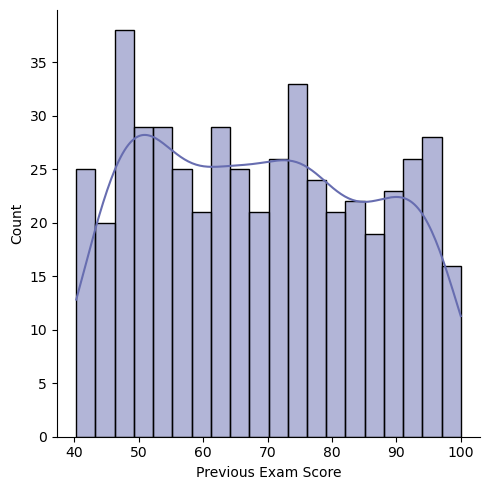

In [8]:
sns.displot(x = data['Previous Exam Score'] , bins = 20, kde = 'normal', color = '#676db0')

In [9]:
corr = data['Previous Exam Score'].corr(data['Study Hours'])
corr

0.010354204028283482

The correlation between exam score and study hours is 0.01 showing that there is no significant relation between the two 

## Model Building

In [10]:
# seperating the data into independent and dependent variable
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [11]:
# spliting the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.75 , random_state = 42) 

### Logistic Regression 

In [12]:
# logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()
params = {'penalty' : ['l2' , 'l1' , 'elasticnet'] , 'C' : [1e-3 , 1e-2 , 0.1 , 1, 2, 3, 4, 5, 6, 8, 10, 20, 50] , 'max_iter' : [100, 200, 300]}
logistic_regressor = GridSearchCV(logistic, param_grid=params, scoring = 'accuracy', cv=10)
logistic_regressor.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
780 fits failed out of a total of 1170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 8, 10, 20,
                               50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [13]:
print(logistic_regressor.best_params_)
print(logistic_regressor.best_score_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
0.8772403982930299


In [14]:
# making a confusion matrix and classification report for better visuablization
y_pred = logistic_regressor.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[73  6]
 [10 36]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.86      0.78      0.82        46

    accuracy                           0.87       125
   macro avg       0.87      0.85      0.86       125
weighted avg       0.87      0.87      0.87       125



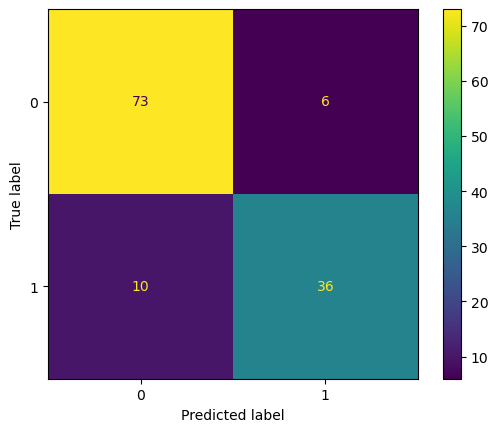

In [16]:
ConfusionMatrixDisplay(cm).plot()

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train , y_train)

GaussianNB()

In [18]:
gnb.score(X_test, y_test)

0.928

In [19]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        79
           1       1.00      0.80      0.89        46

    accuracy                           0.93       125
   macro avg       0.95      0.90      0.92       125
weighted avg       0.94      0.93      0.93       125



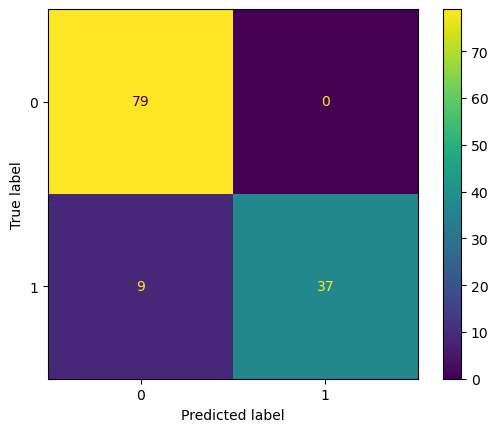

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [22]:
knn.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.96

In [23]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.96      0.93      0.95        46

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


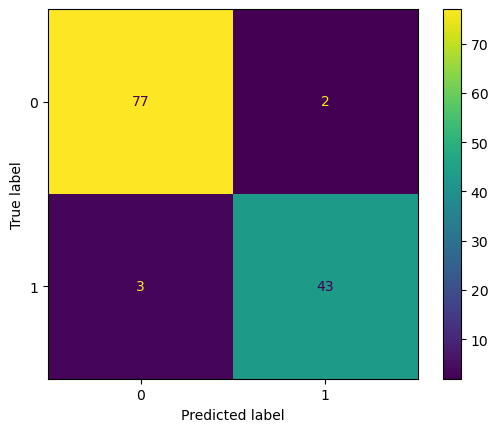

In [24]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[0] <= 5.098\ngini = 0.465\nsamples = 375\nvalue = [237, 138]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.6, 0.5, 'X[1] <= 59.379\ngini = 0.449\nsamples = 209\nvalue = [71, 138]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 138\nvalue = [0, 138]')]

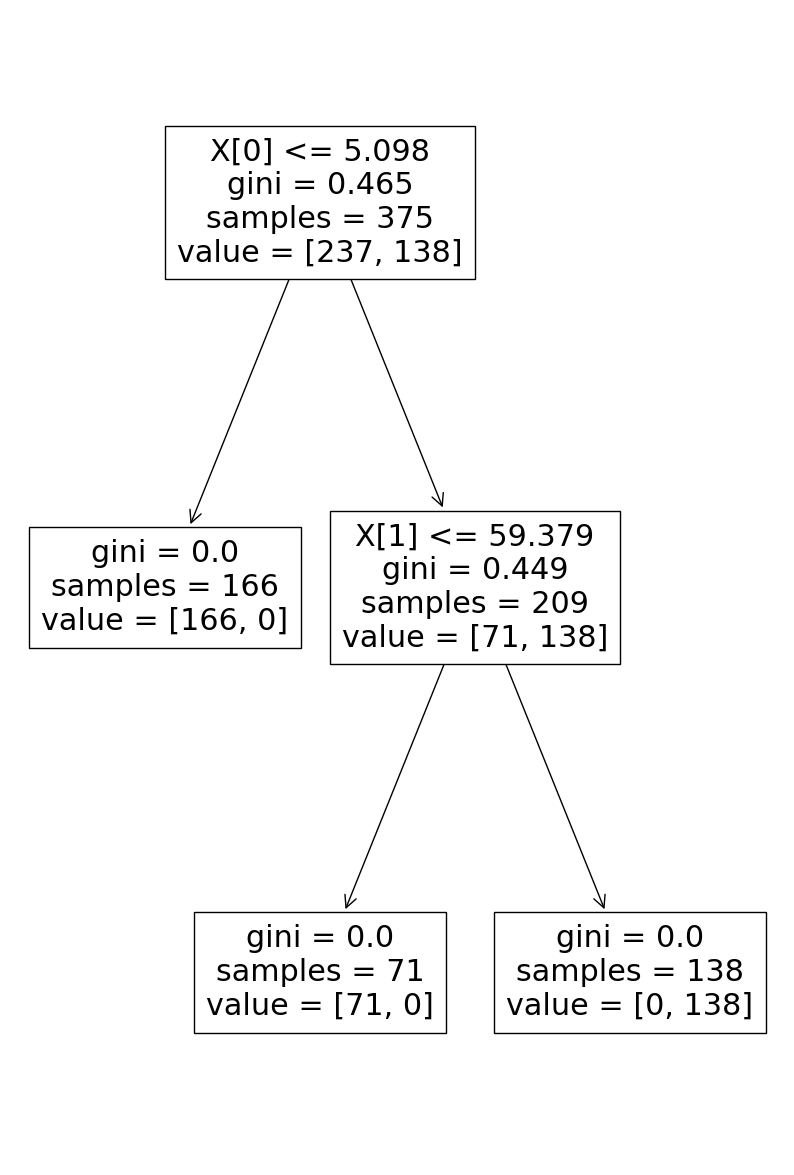

In [27]:
from sklearn import tree
plt.figure(figsize=(10, 15))
tree.plot_tree(tree_reg)

In [28]:
y_pred = tree_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.98      0.99        46

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



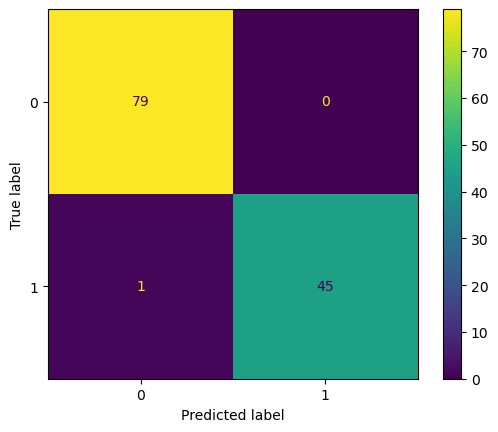

In [29]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()